In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt

In [2]:
#unifying names 
data=pd.read_csv("cleaned_train.csv")
data=data[data["length_time"]<=4236]
data=data.loc[data["length_time"]>=60] 
data=data.loc[data["trip_distance"]>=0.01]

In [15]:
data

,weight,response,length_time,pickup_boro_code,pickup_nta_code,dropoff_boro_code,dropoff_nta_code,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id,passenger_count,trip_distance,fare_amount,pickup_datetime,pickup_week,pickup_wday
0,1,1.75,520,Manhattan,MN15,Manhattan,MN19,-73.983009,40.766602,-73.967972,40.760677,1,1,0.90,7.0,2015-05-11 18:00:00,20,Monday
1,1,2.95,824,Manhattan,MN21,Manhattan,MN24,-73.989510,40.734470,-73.997185,40.717976,1,1,1.40,10.0,2015-05-06 18:00:00,19,Wednesday
2,1,2.46,1016,Manhattan,MN25,Manhattan,MN27,-74.012741,40.702229,-73.998878,40.713711,2,1,1.14,11.5,2015-05-11 07:00:00,20,Monday
3,1,1.66,550,Manhattan,MN99,Manhattan,MN20,-73.970909,40.767231,-73.979507,40.752331,2,1,1.28,7.5,2015-05-13 11:00:00,20,Wednesday
4,1,1.75,501,Manhattan,MN20,Manhattan,MN22,-73.973869,40.747925,-73.986618,40.730328,1,1,1.40,7.5,2015-05-07 20:00:00,19,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341001,1,2.00,740,Manhattan,MN12,Manhattan,MN36,-73.978676,40.783512,-73.938370,40.850533,2,1,5.84,18.5,2015-05-24 20:00:00,21,Sunday
341002,1,1.00,193,Manhattan,MN14,Manhattan,MN12,-73.982048,40.775452,-73.976860,40.783520,2,6,0.70,4.5,2015-05-20 23:00:00,21,Wednesday
341003,1,2.35,764,Manhattan,MN20,Manhattan,MN22,-73.974472,40.747253,-73.983070,40.726955,1,1,1.70,10.0,2015-05-11 19:00:00,20,Monday
341004,1,2.65,955,Manhattan,MN13,Manhattan,MN27,-73.993607,40.745293,-73.987350,40.722256,1,1,2.20,12.0,2015-05-19 21:00:00,21,Tuesday


In [4]:
y=data["response"]
X=data.drop(["response"], axis=1)
X['vendor_id']=X["vendor_id"].map(str)
X['pickup_boro_code']=X["pickup_boro_code"].map(str)
X['dropoff_boro_code']=X["dropoff_boro_code"].map(str)
X=pd.get_dummies(X)

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def plot_residuals(model, X, y):
    """
    Plot residuals of a model.
    
    Parameters:
        model: Fitted regression model (e.g., from scikit-learn)
        X: Independent variables (features)
        y: Observed values
        
    Returns:
        None
    """
    # Make predictions using the model
    y_pred = model.predict(X)

    # Compute residuals
    residuals = y - y_pred

    # Plot residuals against predicted values
    plt.scatter(y_pred, residuals)
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
    plt.show()

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn
# Load the Iris dataset

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_regressor = sklearn.ensemble.HistGradientBoostingRegressor(loss="absolute_error" ,random_state=42 ,verbose=3, early_stopping=True ,max_iter=10000)

# Train the Random Forest classifier on the training data
rf_regressor.fit(X_train, y_train)

Binning 2.161 GB of training data: 13.324 s
Binning 0.240 GB of validation data: 0.241 s
Fitting gradient boosted rounds:
[1/10000] 1 tree, 31 leaves, max depth = 10, train loss: 1.27636, val loss: 1.27442, in 0.552s
[2/10000] 1 tree, 31 leaves, max depth = 8, train loss: 1.19005, val loss: 1.18945, in 0.518s
[3/10000] 1 tree, 31 leaves, max depth = 9, train loss: 1.11541, val loss: 1.11601, in 0.475s
[4/10000] 1 tree, 31 leaves, max depth = 11, train loss: 1.04857, val loss: 1.05042, in 0.475s
[5/10000] 1 tree, 31 leaves, max depth = 8, train loss: 0.98863, val loss: 0.99113, in 0.485s
[6/10000] 1 tree, 31 leaves, max depth = 7, train loss: 0.93514, val loss: 0.93833, in 0.479s
[7/10000] 1 tree, 31 leaves, max depth = 6, train loss: 0.89270, val loss: 0.89638, in 0.475s
[8/10000] 1 tree, 31 leaves, max depth = 12, train loss: 0.85725, val loss: 0.86116, in 0.452s
[9/10000] 1 tree, 31 leaves, max depth = 11, train loss: 0.82229, val loss: 0.82612, in 0.510s
[10/10000] 1 tree, 31 leaves

HistGradientBoostingRegressor(early_stopping=True, loss='absolute_error',
                              max_iter=10000, random_state=42, verbose=3)

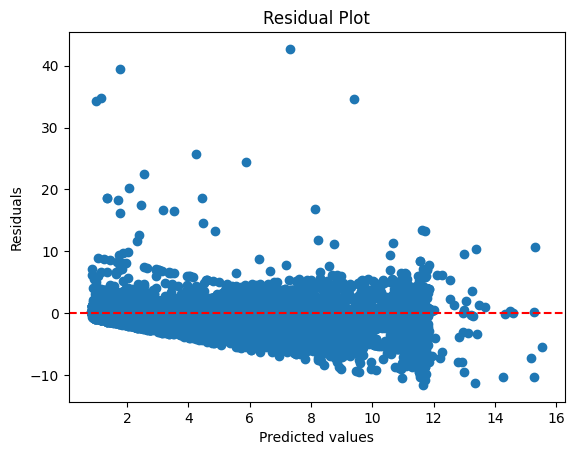

0.544659956066666

In [42]:
pred=rf_regressor.predict(X_test)
plot_residuals(rf_regressor,X_test,y_test)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(pred,y_test)

In [43]:
pd.Series(pred).describe()

count    68202.000000
mean         2.919372
std          2.134766
min          0.828072
25%          1.640484
50%          2.239998
75%          3.325132
max         15.535436
dtype: float64

In [47]:
data["response"].describe()

count    341006.000000
mean          2.786166
std           2.383984
min           0.010000
25%           1.450000
50%           2.000000
75%           3.160000
max         250.000000
Name: response, dtype: float64

In [33]:
test=pd.read_csv("cleaned_test.csv")
test['vendor_id']=test["vendor_id"].map(str)
test['pickup_boro_code']=test["pickup_boro_code"].map(str)
test['dropoff_boro_code']=test["dropoff_boro_code"].map(str)
test=pd.get_dummies(test)

In [35]:
test

,length_time,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,fare_amount,pickup_week,pickup_boro_code_Brooklyn,pickup_boro_code_Manhattan,pickup_boro_code_Queens,pickup_boro_code_Staten Island,pickup_boro_code_The Bronx,pickup_nta_code_BK09,pickup_nta_code_BK19,pickup_nta_code_BK21,pickup_nta_code_BK28,pickup_nta_code_BK29,pickup_nta_code_BK31,pickup_nta_code_BK32,pickup_nta_code_BK33,pickup_nta_code_BK34,pickup_nta_code_BK35,pickup_nta_code_BK37,pickup_nta_code_BK38,pickup_nta_code_BK40,pickup_nta_code_BK41,pickup_nta_code_BK42,pickup_nta_code_BK43,pickup_nta_code_BK45,pickup_nta_code_BK46,pickup_nta_code_BK50,pickup_nta_code_BK60,pickup_nta_code_BK61,pickup_nta_code_BK63,pickup_nta_code_BK64,pickup_nta_code_BK68,pickup_nta_code_BK69,pickup_nta_code_BK72,pickup_nta_code_BK73,pickup_nta_code_BK75,pickup_nta_code_BK76,pickup_nta_code_BK77,pickup_nta_code_BK78,pickup_nta_code_BK79,pickup_nta_code_BK81,pickup_nta_code_BK82,pickup_nta_code_BK83,pickup_nta_code_BK88,pickup_nta_code_BK90,pickup_nta_code_BK91,pickup_nta_code_BK95,pickup_nta_code_BK96,pickup_nta_code_BK99,pickup_nta_code_BX01,pickup_nta_code_BX05,pickup_nta_code_BX10,pickup_nta_code_BX13,pickup_nta_code_BX14,pickup_nta_code_BX17,pickup_nta_code_BX22,pickup_nta_code_BX26,pickup_nta_code_BX28,pickup_nta_code_BX29,pickup_nta_code_BX34,pickup_nta_code_BX35,pickup_nta_code_BX36,pickup_nta_code_BX37,pickup_nta_code_BX39,pickup_nta_code_BX41,pickup_nta_code_BX43,pickup_nta_code_BX49,pickup_nta_code_BX62,pickup_nta_code_BX63,pickup_nta_code_MN01,pickup_nta_code_MN03,pickup_nta_code_MN04,pickup_nta_code_MN06,pickup_nta_code_MN09,pickup_nta_code_MN11,pickup_nta_code_MN12,pickup_nta_code_MN13,pickup_nta_code_MN14,pickup_nta_code_MN15,pickup_nta_code_MN17,pickup_nta_code_MN19,pickup_nta_code_MN20,pickup_nta_code_MN21,pickup_nta_code_MN22,pickup_nta_code_MN23,pickup_nta_code_MN24,pickup_nta_code_MN25,pickup_nta_code_MN27,pickup_nta_code_MN28,pickup_nta_code_MN31,pickup_nta_code_MN32,pickup_nta_code_MN33,pickup_nta_code_MN34,pickup_nta_code_MN35,pickup_nta_code_MN36,pickup_nta_code_MN40,pickup_nta_code_MN50,pickup_nta_code_MN99,pickup_nta_code_QN01,pickup_nta_code_QN02,pickup_nta_code_QN03,pickup_nta_code_QN07,pickup_nta_code_QN17,pickup_nta_code_QN18,pickup_nta_code_QN19,pickup_nta_code_QN20,pickup_nta_code_QN21,pickup_nta_code_QN22,pickup_nta_code_QN25,pickup_nta_code_QN26,pickup_nta_code_QN27,pickup_nta_code_QN28,pickup_nta_code_QN29,pickup_nta_code_QN30,pickup_nta_code_QN31,pickup_nta_code_QN34,pickup_nta_code_QN35,pickup_nta_code_QN37,pickup_nta_code_QN45,pickup_nta_code_QN50,pickup_nta_code_QN51,pickup_nta_code_QN52,pickup_nta_code_QN53,pickup_nta_code_QN54,pickup_nta_code_QN55,pickup_nta_code_QN56,pickup_nta_code_QN60,pickup_nta_code_QN61,pickup_nta_code_QN63,pickup_nta_code_QN68,pickup_nta_code_QN70,pickup_nta_code_QN71,pickup_nta_code_QN72,pickup_nta_code_QN76,pickup_nta_code_QN98,pickup_nta_code_QN99,pickup_nta_code_SI22,pickup_nta_code_SI24,pickup_nta_code_SI35,pickup_nta_code_SI37,dropoff_boro_code_Brooklyn,dropoff_boro_code_Manhattan,dropoff_boro_code_Queens,dropoff_boro_code_Staten Island,dropoff_boro_code_The Bronx,dropoff_nta_code_BK09,dropoff_nta_code_BK17,dropoff_nta_code_BK19,dropoff_nta_code_BK21,dropoff_nta_code_BK23,dropoff_nta_code_BK25,dropoff_nta_code_BK26,dropoff_nta_code_BK27,dropoff_nta_code_BK28,dropoff_nta_code_BK29,dropoff_nta_code_BK30,dropoff_nta_code_BK31,dropoff_nta_code_BK32,dropoff_nta_code_BK33,dropoff_nta_code_BK34,dropoff_nta_code_BK35,dropoff_nta_code_BK37,dropoff_nta_code_BK38,dropoff_nta_code_BK40,dropoff_nta_code_BK41,dropoff_nta_code_BK42,dropoff_nta_code_BK43,dropoff_nta_code_BK44,dropoff_nta_code_BK45,dropoff_nta_code_BK46,dropoff_nta_code_BK50,dropoff_nta_code_BK58,dropoff_nta_code_BK60,dropoff_nta_code_BK61,dropoff_nta_code_BK63,dropoff_nta_code_BK64,dropoff_nta_code_BK68,dropoff_nta_code_BK69,dropoff_nta_code_BK72,dropoff_nta_code_BK73,dropoff_nta_code_BK75,dropoff_nta_code_BK76,drop

In [30]:
test = test.reindex(X.columns, axis=1, fill_value=0)

In [31]:
result=pd.Series(rf_regressor.predict(test))

In [38]:
result.to_csv("result_XGB.txt",sep="\t", index=False,header=False)

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores=learning_curve(estimator=rf_regressor,X=x_train,y=y_train)
plt.plot(train_sizes,train_scores),plt.plot(train_sizes,valid_scores)
